максимально правильное изучение r2_score.
как пример для последующих работ.

#### План работы
1. основные сведения.
2. простые алгебраические сравнения
3. графические интерпритации сравнения (2d 3d)

# 1. основные сведения.

Коэффициент детерминации ({\displaystyle R^{2}}R^2 — R-квадрат) — это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными. Более точно — это единица минус доля необъяснённой дисперсии (дисперсии случайной ошибки модели, или условной по факторам дисперсии зависимой переменной) в дисперсии зависимой переменной. Его рассматривают как универсальную меру зависимости одной случайной величины от множества других. В частном случае линейной зависимости {\displaystyle R^{2}}R^2 является квадратом так называемого множественного коэффициента корреляции между зависимой переменной и объясняющими переменными. В частности, для модели парной линейной регрессии коэффициент детерминации равен квадрату обычного коэффициента корреляции между y и x.

##### Основная проблема применения (выборочного) {\displaystyle R^{2}}R^2 заключается в том, что его значение увеличивается (не уменьшается) от добавления в модель новых переменных, даже если эти переменные никакого отношения к объясняемой переменной не имеют! Поэтому сравнение моделей с разным количеством факторов с помощью коэффициента детерминации, вообще говоря, некорректно. Для этих целей можно использовать альтернативные показатели.

##### Высокие значения коэффициента детерминации, вообще говоря, не свидетельствуют о наличии причинно-следственной зависимости между переменными (так же как и в случае обычного коэффициента корреляции). Например, если объясняемая переменная и факторы, на самом деле не связанные с объясняемой переменой, имеют возрастающую динамику, то коэффициент детерминации будет достаточно высок. Поэтому логическая и смысловая адекватность модели имеют первостепенную важность. Кроме того, необходимо использовать критерии для всестороннего анализа качества модели.

# 2. простые алгебраические сравнения

##### мы сравним 
1. совпали
2. перевернулись
3. совпала одна маленькая потом все большие
4. совпала одна большая потом все маленькие
5. не совпала одна маленькая
6. не совпала одна большая

In [8]:
from sklearn.metrics import r2_score
data_clean = [1,   2,    3,   4,   5,   11]
data_progn = [[1,   2,    3,   4,   5,   11], [11,   5,   4,   3,   2,   1],
              [1,   11,    11,   11,   11,   11],[1,   1,    1,   1,   1,   11],
              [0,   2,    3,   4,   5,   11],[1,   2,    3,   4,   5,   0]]
for i in range(0,6):
    print(i, r2_score(data_clean,data_progn[i]), data_clean,data_progn[i])


0 1.0 [1, 2, 3, 4, 5, 11] [1, 2, 3, 4, 5, 11]
1 -2.4736842105263155 [1, 2, 3, 4, 5, 11] [11, 5, 4, 3, 2, 1]
2 -2.631578947368421 [1, 2, 3, 4, 5, 11] [1, 11, 11, 11, 11, 11]
3 0.5263157894736843 [1, 2, 3, 4, 5, 11] [1, 1, 1, 1, 1, 11]
4 0.9842105263157894 [1, 2, 3, 4, 5, 11] [0, 2, 3, 4, 5, 11]
5 -0.9105263157894736 [1, 2, 3, 4, 5, 11] [1, 2, 3, 4, 5, 0]


# 3. графические интерпритации сравнения (2d 3d)

будем отодвигать значения всех элементов вектора на некоторое значение (1/100 1/10000)
отдельно отодвинем от серидины и от непосредвенно значения

In [61]:
from sklearn.metrics import r2_score
data_clean = [1,   2,    3,   4,   5,   11]
data_progn_100 = [data_clean]
data_progn_10000 = [data_clean]
data_progn_midl100 = [data_clean]
data_progn_midle1000 = [data_clean]

for i in range(1,100):
    data_clean_new_100 = []
    data_clean_new_10000 = []
    data_clean_new_midle100 = []
    data_clean_new_midle10000 = []
    for j in range(0,6):
        data_clean_new_100.append(float(data_clean[j]-i/100))
        data_clean_new_10000.append(float(data_clean[j]-i/10000))
        data_clean_new_midle100.append(float(data_clean[j]/2-i/100))        
        data_clean_new_midle10000.append(float(data_clean[j]/2-i/10000))
    data_progn_100.append(data_clean_new_100)
    data_progn_10000.append(data_clean_new_10000)
    data_progn_midl100.append(data_clean_new_midle100)
    data_progn_midle1000.append(data_clean_new_midle10000)

Populating the interactive namespace from numpy and matplotlib


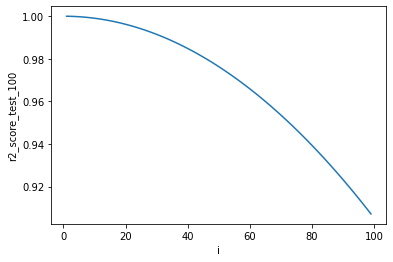

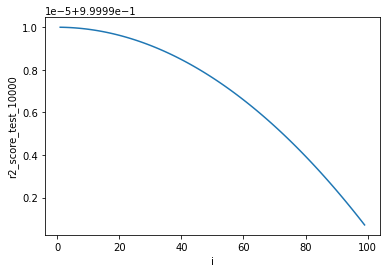

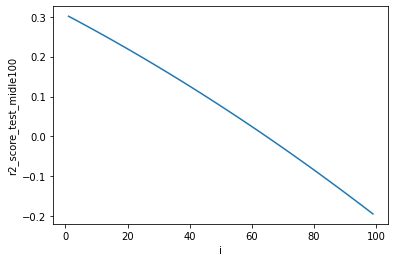

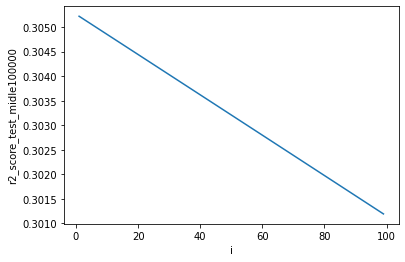

In [63]:
%pylab inline
r2_score_test_100 = []
r2_score_test_10000 = []
r2_score_test_midle100 = []
r2_score_test_midle100000 = []


i_test =[]
startValue = 1
endValue = 100
for i in range(startValue,endValue):
    r2_score_test_100.append(r2_score(data_clean,data_progn_100[i]))
    r2_score_test_10000.append(r2_score(data_clean,data_progn_10000[i]))
    r2_score_test_midle100.append(r2_score(data_clean,data_progn_midl100[i]))
    r2_score_test_midle100000.append(r2_score(data_clean,data_progn_midle1000[i]))


    
plt.plot(range(startValue, endValue), r2_score_test_100)
plt.xlabel('i')
plt.ylabel('r2_score_test_100')
plt.show()
plt.plot(range(startValue, endValue), r2_score_test_10000)
plt.xlabel('i')
plt.ylabel('r2_score_test_10000')
plt.show()
plt.plot(range(startValue, endValue), r2_score_test_midle100)
plt.xlabel('i')
plt.ylabel('r2_score_test_midle100')
plt.show()
plt.plot(range(startValue, endValue), r2_score_test_midle100000)
plt.xlabel('i')
plt.ylabel('r2_score_test_midle100000')
plt.show()

проделаем те же самые изменения только изменять будем лишь один элемент массива
сначала первый самый маленький

In [65]:
from sklearn.metrics import r2_score
data_clean = [1,   2,    3,   4,   5,   11]
data_progn_100 = [data_clean]
data_progn_10000 = [data_clean]
data_progn_midl100 = [data_clean]
data_progn_midle1000 = [data_clean]

for i in range(1,100):
    data_clean_new_100 = []
    data_clean_new_10000 = []
    data_clean_new_midle100 = []
    data_clean_new_midle10000 = []
    for j in range(0,6):
        if(j == 0):
            data_clean_new_100.append(float(data_clean[j]-i/100))
            data_clean_new_10000.append(float(data_clean[j]-i/10000))
            data_clean_new_midle100.append(float(data_clean[j]/2-i/100))        
            data_clean_new_midle10000.append(float(data_clean[j]/2-i/10000))
        else:
            data_clean_new_100.append(float(data_clean[j]))
            data_clean_new_10000.append(float(data_clean[j]))
            data_clean_new_midle100.append(float(data_clean[j]))        
            data_clean_new_midle10000.append(float(data_clean[j]))            
    data_progn_100.append(data_clean_new_100)
    data_progn_10000.append(data_clean_new_10000)
    data_progn_midl100.append(data_clean_new_midle100)
    data_progn_midle1000.append(data_clean_new_midle10000)

Populating the interactive namespace from numpy and matplotlib


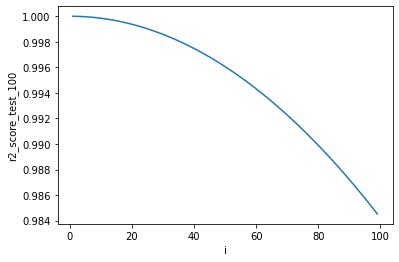

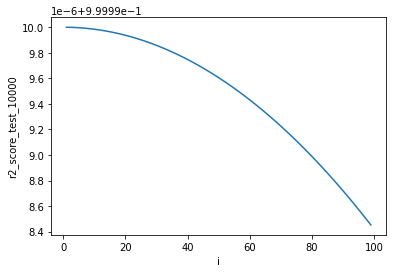

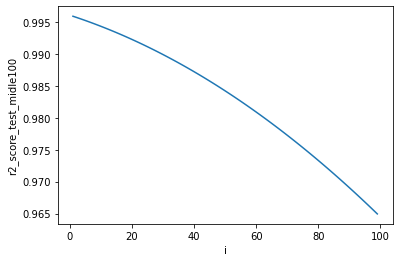

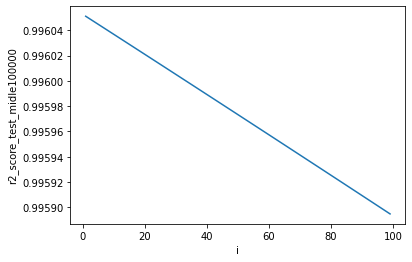

In [66]:
%pylab inline
r2_score_test_100 = []
r2_score_test_10000 = []
r2_score_test_midle100 = []
r2_score_test_midle100000 = []


i_test =[]
startValue = 1
endValue = 100
for i in range(startValue,endValue):
    r2_score_test_100.append(r2_score(data_clean,data_progn_100[i]))
    r2_score_test_10000.append(r2_score(data_clean,data_progn_10000[i]))
    r2_score_test_midle100.append(r2_score(data_clean,data_progn_midl100[i]))
    r2_score_test_midle100000.append(r2_score(data_clean,data_progn_midle1000[i]))


    
plt.plot(range(startValue, endValue), r2_score_test_100)
plt.xlabel('i')
plt.ylabel('r2_score_test_100')
plt.show()
plt.plot(range(startValue, endValue), r2_score_test_10000)
plt.xlabel('i')
plt.ylabel('r2_score_test_10000')
plt.show()
plt.plot(range(startValue, endValue), r2_score_test_midle100)
plt.xlabel('i')
plt.ylabel('r2_score_test_midle100')
plt.show()
plt.plot(range(startValue, endValue), r2_score_test_midle100000)
plt.xlabel('i')
plt.ylabel('r2_score_test_midle100000')
plt.show()

теперь изменим только самый большой

In [67]:
from sklearn.metrics import r2_score
data_clean = [1,   2,    3,   4,   5,   11]
data_progn_100 = [data_clean]
data_progn_10000 = [data_clean]
data_progn_midl100 = [data_clean]
data_progn_midle1000 = [data_clean]

for i in range(1,100):
    data_clean_new_100 = []
    data_clean_new_10000 = []
    data_clean_new_midle100 = []
    data_clean_new_midle10000 = []
    for j in range(0,6):
        if(j == 5):
            data_clean_new_100.append(float(data_clean[j]-i/100))
            data_clean_new_10000.append(float(data_clean[j]-i/10000))
            data_clean_new_midle100.append(float(data_clean[j]/2-i/100))        
            data_clean_new_midle10000.append(float(data_clean[j]/2-i/10000))
        else:
            data_clean_new_100.append(float(data_clean[j]))
            data_clean_new_10000.append(float(data_clean[j]))
            data_clean_new_midle100.append(float(data_clean[j]))        
            data_clean_new_midle10000.append(float(data_clean[j]))            
    data_progn_100.append(data_clean_new_100)
    data_progn_10000.append(data_clean_new_10000)
    data_progn_midl100.append(data_clean_new_midle100)
    data_progn_midle1000.append(data_clean_new_midle10000)

Populating the interactive namespace from numpy and matplotlib


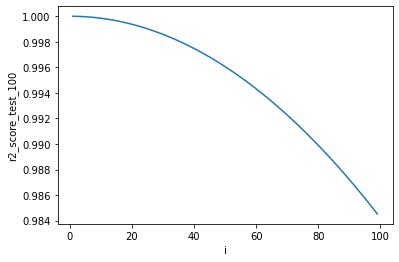

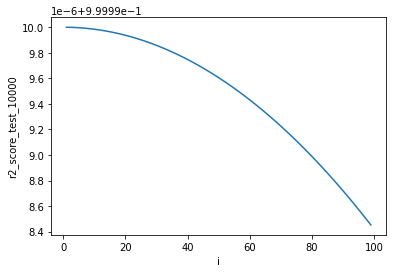

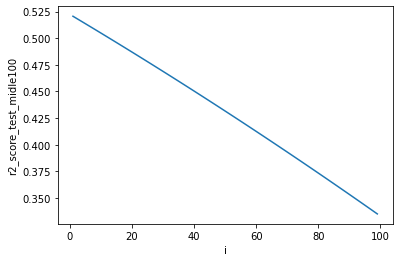

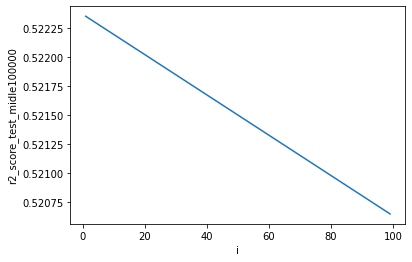

In [68]:
%pylab inline
r2_score_test_100 = []
r2_score_test_10000 = []
r2_score_test_midle100 = []
r2_score_test_midle100000 = []


i_test =[]
startValue = 1
endValue = 100
for i in range(startValue,endValue):
    r2_score_test_100.append(r2_score(data_clean,data_progn_100[i]))
    r2_score_test_10000.append(r2_score(data_clean,data_progn_10000[i]))
    r2_score_test_midle100.append(r2_score(data_clean,data_progn_midl100[i]))
    r2_score_test_midle100000.append(r2_score(data_clean,data_progn_midle1000[i]))


    
plt.plot(range(startValue, endValue), r2_score_test_100)
plt.xlabel('i')
plt.ylabel('r2_score_test_100')
plt.show()
plt.plot(range(startValue, endValue), r2_score_test_10000)
plt.xlabel('i')
plt.ylabel('r2_score_test_10000')
plt.show()
plt.plot(range(startValue, endValue), r2_score_test_midle100)
plt.xlabel('i')
plt.ylabel('r2_score_test_midle100')
plt.show()
plt.plot(range(startValue, endValue), r2_score_test_midle100000)
plt.xlabel('i')
plt.ylabel('r2_score_test_midle100000')
plt.show()

сделаем первый опыт только увеличим длину вектора в 2 раза

In [71]:
from sklearn.metrics import r2_score
data_clean = [1,   2,    3,   4,   5,  6, 7, 8, 9, 10 ,  11,12 ,26]
data_progn_100 = [data_clean]
data_progn_10000 = [data_clean]
data_progn_midl100 = [data_clean]
data_progn_midle1000 = [data_clean]

for i in range(1,100):
    data_clean_new_100 = []
    data_clean_new_10000 = []
    data_clean_new_midle100 = []
    data_clean_new_midle10000 = []
    for j in range(0,13):
        data_clean_new_100.append(float(data_clean[j]-i/100))
        data_clean_new_10000.append(float(data_clean[j]-i/10000))
        data_clean_new_midle100.append(float(data_clean[j]/2-i/100))        
        data_clean_new_midle10000.append(float(data_clean[j]/2-i/10000))
    data_progn_100.append(data_clean_new_100)
    data_progn_10000.append(data_clean_new_10000)
    data_progn_midl100.append(data_clean_new_midle100)
    data_progn_midle1000.append(data_clean_new_midle10000)

Populating the interactive namespace from numpy and matplotlib


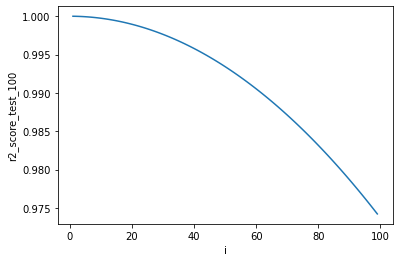

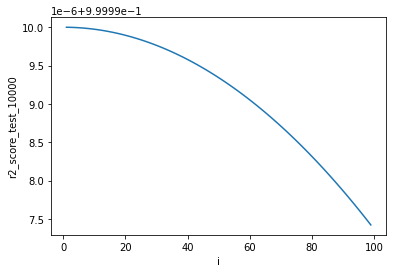

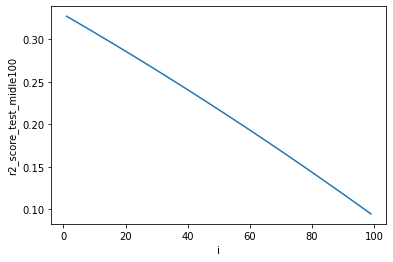

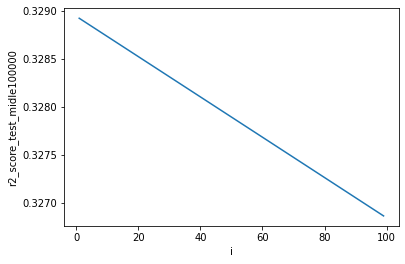

In [72]:
%pylab inline
r2_score_test_100 = []
r2_score_test_10000 = []
r2_score_test_midle100 = []
r2_score_test_midle100000 = []


i_test =[]
startValue = 1
endValue = 100
for i in range(startValue,endValue):
    r2_score_test_100.append(r2_score(data_clean,data_progn_100[i]))
    r2_score_test_10000.append(r2_score(data_clean,data_progn_10000[i]))
    r2_score_test_midle100.append(r2_score(data_clean,data_progn_midl100[i]))
    r2_score_test_midle100000.append(r2_score(data_clean,data_progn_midle1000[i]))


    
plt.plot(range(startValue, endValue), r2_score_test_100)
plt.xlabel('i')
plt.ylabel('r2_score_test_100')
plt.show()
plt.plot(range(startValue, endValue), r2_score_test_10000)
plt.xlabel('i')
plt.ylabel('r2_score_test_10000')
plt.show()
plt.plot(range(startValue, endValue), r2_score_test_midle100)
plt.xlabel('i')
plt.ylabel('r2_score_test_midle100')
plt.show()
plt.plot(range(startValue, endValue), r2_score_test_midle100000)
plt.xlabel('i')
plt.ylabel('r2_score_test_midle100000')
plt.show()